<a href="https://colab.research.google.com/github/Sukruth99/CN-CS646-/blob/main/CS666_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

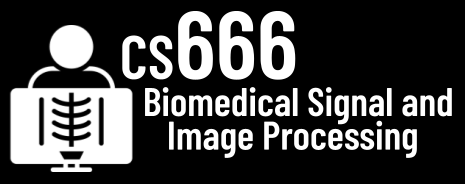
# Assignment 6

In [ ]:
# NAME:SUKRUTH KOTTURU

In [1]:
  # In this assignment, we will explore the new Segment-Anything-Model (https://segment-anything.com/)
  # for the task of mitochondria detection in a connectomics dataset acquired using electron microscopy.
  #
  # We will run the following experiments:
  #
  # 1. Using the Segment-Anything-Model (SAM) without seeds in auto mode
  #
  # 2. Train a U-Net classifier from scratch
  #
  # 3. Evaluate the U-Net classifier
  #
  # 4. Use the U-Net to seed the SAM model (U-Net + SAM)
  #
  # 5. Compare U-Net vs. U-Net + SAM
  #
  # Bonus: Improve U-Net + SAM

In [2]:
### IMPORTANT (DO THIS RIGHT AWAY!) ###
#
# Activate GPU support: Runtime -> Change Runtime Type
# Hardware Accelerator: GPU
#
### IMPORTANT ###

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# We will use mahotas as well!
!pip install mahotas --no-binary :all:
import mahotas as mh


DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: mahotas is being installed using the legacy 'setup.py install' method, because the '--no-binary' option was enabled for it and this currently disables local wheel building for projects that don't have a 'pyproject.toml' file. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussio

In [5]:
# And of course, we need the data!
!wget https://cs666.org/data/mito.npz

--2023-04-24 22:15:00--  https://cs666.org/data/mito.npz
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37610178 (36M) [application/octet-stream]
Saving to: ‘mito.npz’

mito.npz            100%[===================>]  35.87M  --.-KB/s    in 0.1s    

2023-04-24 22:15:02 (288 MB/s) - ‘mito.npz’ saved [37610178/37610178]



## 0. Data loading (5 points)

In [6]:
# The data includes images and manually segmented masks.
loaded = np.load('mito.npz')
images = loaded['arr_0'][0]
masks = loaded['arr_0'][1]

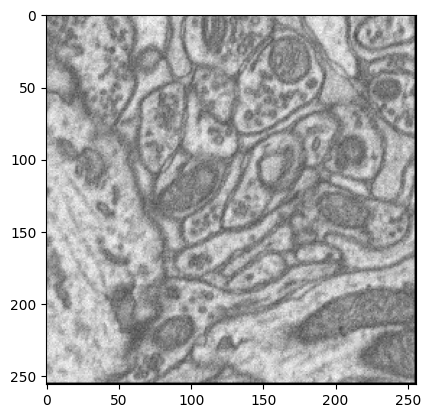

In [7]:
# TODO: Show the first image with the gray colormap.
# TODO: YOUR_CODE
import matplotlib.pyplot as plt

plt.imshow(images[0], cmap='gray')
plt.show()

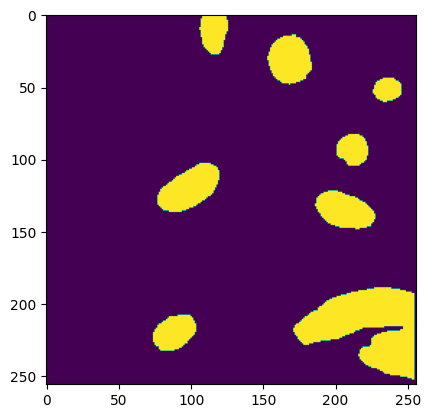

In [8]:
# TODO: Show the first mask.
import matplotlib.pyplot as plt

plt.imshow(masks[0])
plt.show()

## 1. SAM in AUTO mode (15 points)

In [9]:
# We will use the METASEG package as an easy-to-use layer
# for SAM.
!pip install metaseg

!pip install metaseg==0.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for metaseg: filename=metaseg-0.7.0-py3-none-any.whl size=45787 sha256=07838cc1b1c428d3760d3f3c87b9508ff91f72ac9300bcfc7c102d8df527547a
  Stored in directory: /root/.cache/pip/wheels/3f/3f/89/039a62d4b580e94d8d678cc5b91dd4adffab3c0e78d11f0deb
Successfully built metaseg
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 17.1 MB/s eta 0:00:00
   

In [10]:
# SAM comes in two modes, auto and with seeds
from metaseg import SegAutoMaskPredictor, SegManualMaskPredictor

In [11]:
# SAM takes files as input!
# So we have to store the numpy array to disk.
mh.imsave('first.png', images[0])

In [18]:
#
# Run SAM in auto mode on first.png and store
# the result as first_output.png.
#
results = SegAutoMaskPredictor().image_predict(
    source="first.png",
    model_type="vit_l", # vit_l, vit_h, vit_b
    points_per_side=16, 
    points_per_batch=64,
    min_area=0,
    output_path="first_output.png",
    show=False,
    save=True,
)

vit_l model has been successfully downloaded and saved as 'vit_l.pth'.


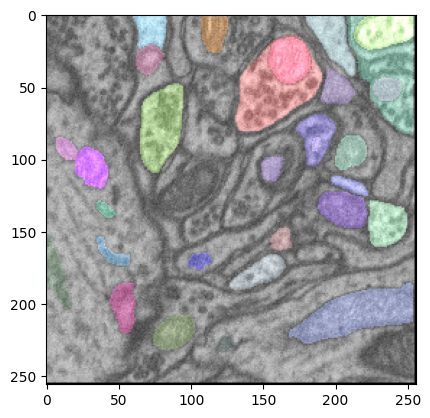

In [19]:
imshow( mh.imread('first_output.png') )

In [14]:
# TODO: Does SAM work well for mitochondria detection?
# TODO: YOUR_ANSWER: YES, it works well.

In [15]:
# TODO: Try the auto predictor on your image!
# 
# Please upload your own image and test how well
# the auto mode of SAM performs!
#
# Run SAM in auto mode on that image and store
# the result as second_output.png. Show the output!
#

vit_h model already exists as 'vit_h.pth'. Skipping download.


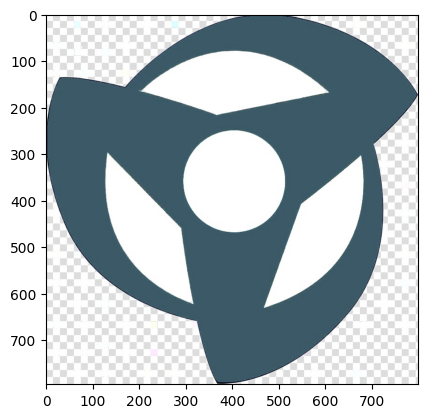

In [21]:
# TODO: YOUR CODE
results2 = SegAutoMaskPredictor().image_predict(
    source="ssss.jpg",
    model_type="vit_h", # vit_l, vit_h, vit_b
    points_per_side=16, 
    points_per_batch=64,
    min_area=0,
    output_path="ssss.jpg",
    show=False,
    save=True,
)
imshow( mh.imread('ssss.jpg') )



In [43]:
# TODO: Does SAM work well on your example?
# TODO: YOUR_ANSWER : YES, It works fine.

## 2. Train a U-Net classifier from scratch (50 points)


In [22]:
# We will use the keras_unet package!
#
# HINT: There is documentation available here, if you are stuck during this part
# of the assignment: https://github.com/karolzak/keras-unet
!pip install keras_unet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# keras_unet has convenience functions to visualize data
from keras_unet.utils import plot_imgs

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


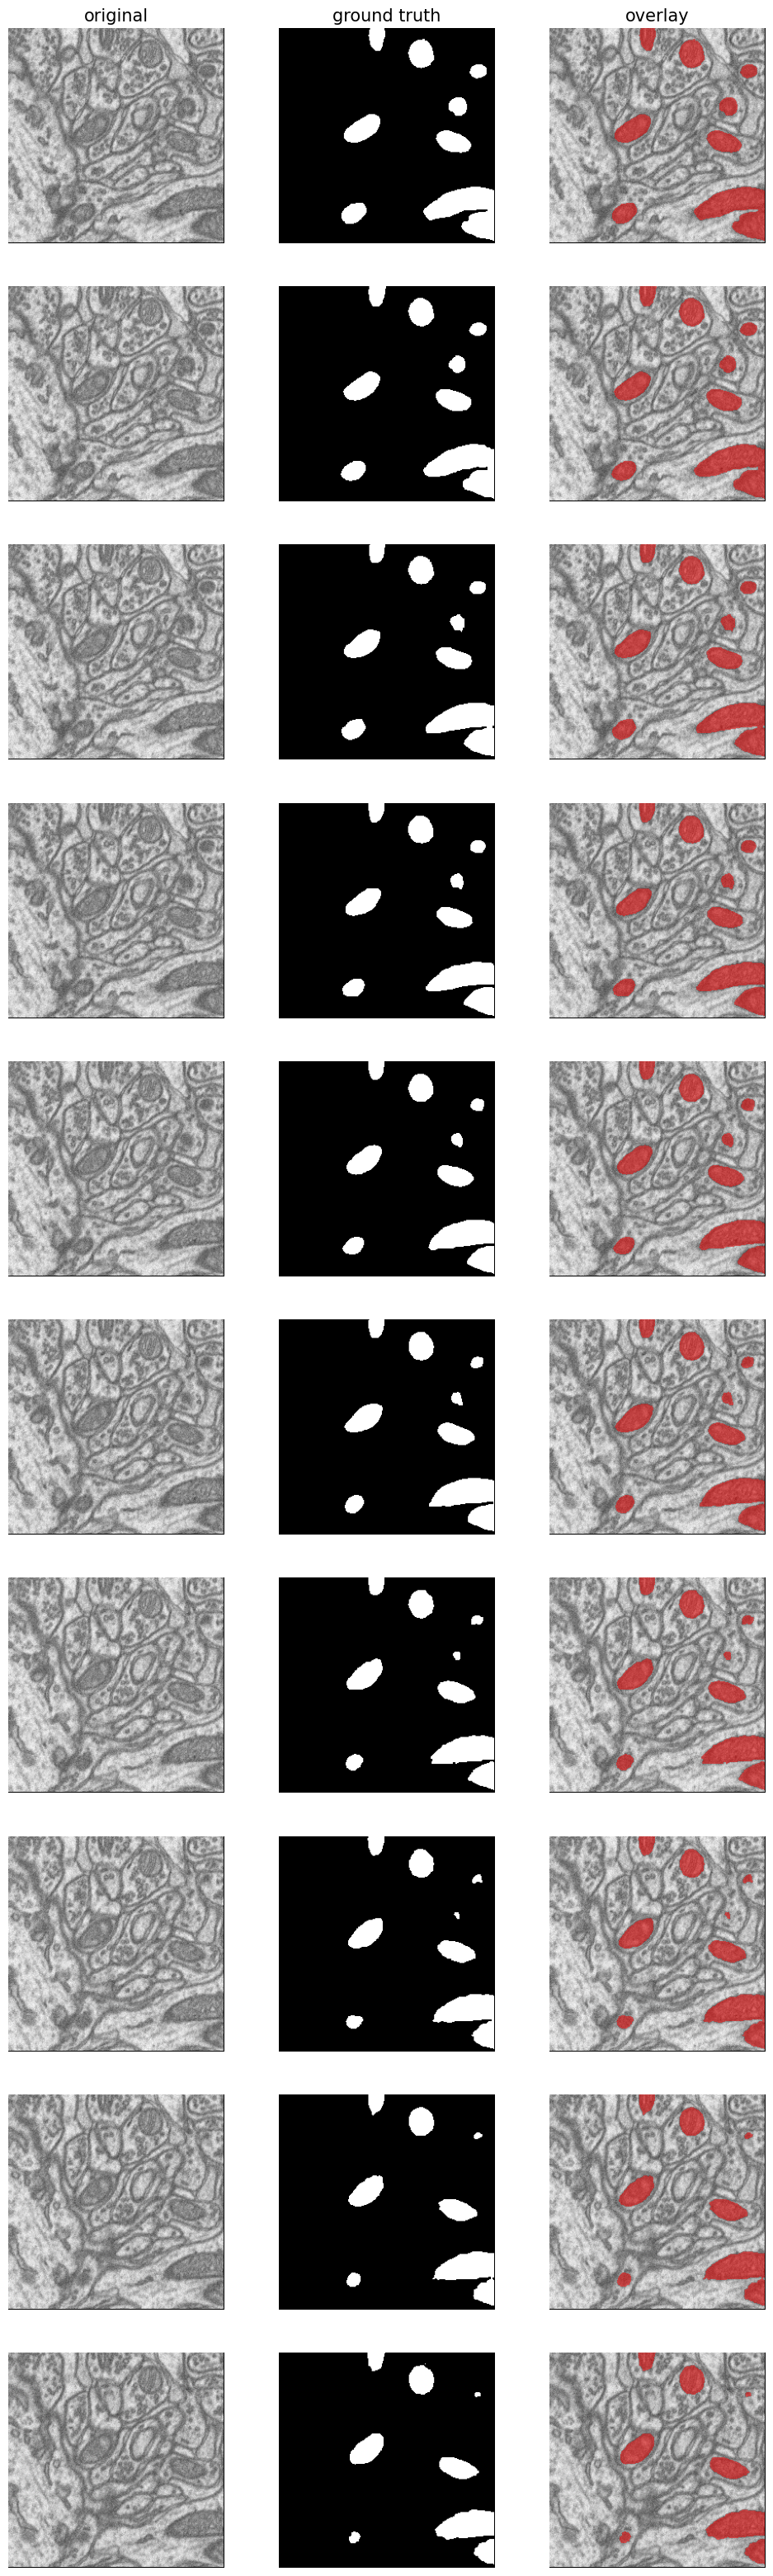

In [24]:
# Let's plot a few images and masks.
plot_imgs(org_imgs=images, mask_imgs=masks)

In [25]:
# The images are in this format.
print( images.shape, images.max(), images.dtype )

(660, 256, 256) 243 uint8


In [26]:
# TODO convert the format to the following:
# (660, 256, 256, 1) 1.0 float32
#
# 1) convert to float32
# 2) normalize to the range of 0..1
# 3) Add the last channel using .reshape like in class
#
# TODO: YOUR_CODE
# X = 
X = images.astype('float32') / 255.0

# Add last channel to images
X = X.reshape(X.shape + (1,))

In [27]:
# Validate that everything matches accordingly
print( X.shape, X.max(), X.dtype )

(660, 256, 256, 1) 0.9529412 float32


In [28]:
# The masks are in this format.
print( masks.shape, masks.max(), masks.dtype )

(660, 256, 256) 255 uint8


In [31]:
# TODO convert the format to the following:
# (660, 256, 256, 1) True bool
#
# 1) convert to bool
# 2) Add the last channel using .reshape like in class
#
# TODO: YOUR_CODE
# y = 

y = masks.astype(bool)

y = masks.reshape(masks.shape[0], masks.shape[1], masks.shape[2], 1)

print(masks.shape, masks.dtype, masks.max())

(660, 256, 256, 1) bool True


In [32]:
# Validate that everything matches accordingly
print( y.shape, y.max(), y.dtype )

(660, 256, 256, 1) True bool


In [33]:
#
# Now we will create our train/val/test splits using scikit-learn!
#
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [36]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (369, 256, 256, 1)
y_train:  (369, 256, 256, 1)
X_val:  (159, 256, 256, 1)
y_val:  (159, 256, 256, 1)
X_test:  (132, 256, 256, 1)
y_test:  (132, 256, 256, 1)


In [ ]:
# TODO: Why do we call train_test_split twice?
# TODO: YOUR_ANSWER :      The train_test_split function is used twice in the code to create training, validation,
 #and testing sets. These subsets are used to evaluate the model's performance on unseen data and tune its hyperparameters.
  #The test_size parameter determines the size of the subsets, and random_state ensures reproducibility. 
 # The split dataset is used to train, validate, and test the model.

In [41]:
#
# We will use keras_unet's built-in data augmentation
# functionality.
#
from keras_unet.utils import get_augmented

train_gen = get_augmented(
    X_train, y_train, batch_size=2,
    data_gen_args = dict(
        rotation_range=15.,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=50,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant'
    ))

In [ ]:
# TODO: Please explain the code from above.
# TODO: YOUR_ANSWER: Thet are using a Python library called keras_unet to apply data augmentation to a set of
 #training images and their corresponding masks. Data augmentation is a technique that artificially increases the 
 #size of a training dataset by creating new, slightly modified versions of the original data. This is done to 
 #improve the performance and generalization of machine learning models. The keras_unet library provides an easy
  #way to apply various data augmentation techniques to a set of images and their masks, which can be useful for training image segmentation models.

(2, 256, 256, 1) (2, 256, 256, 1)


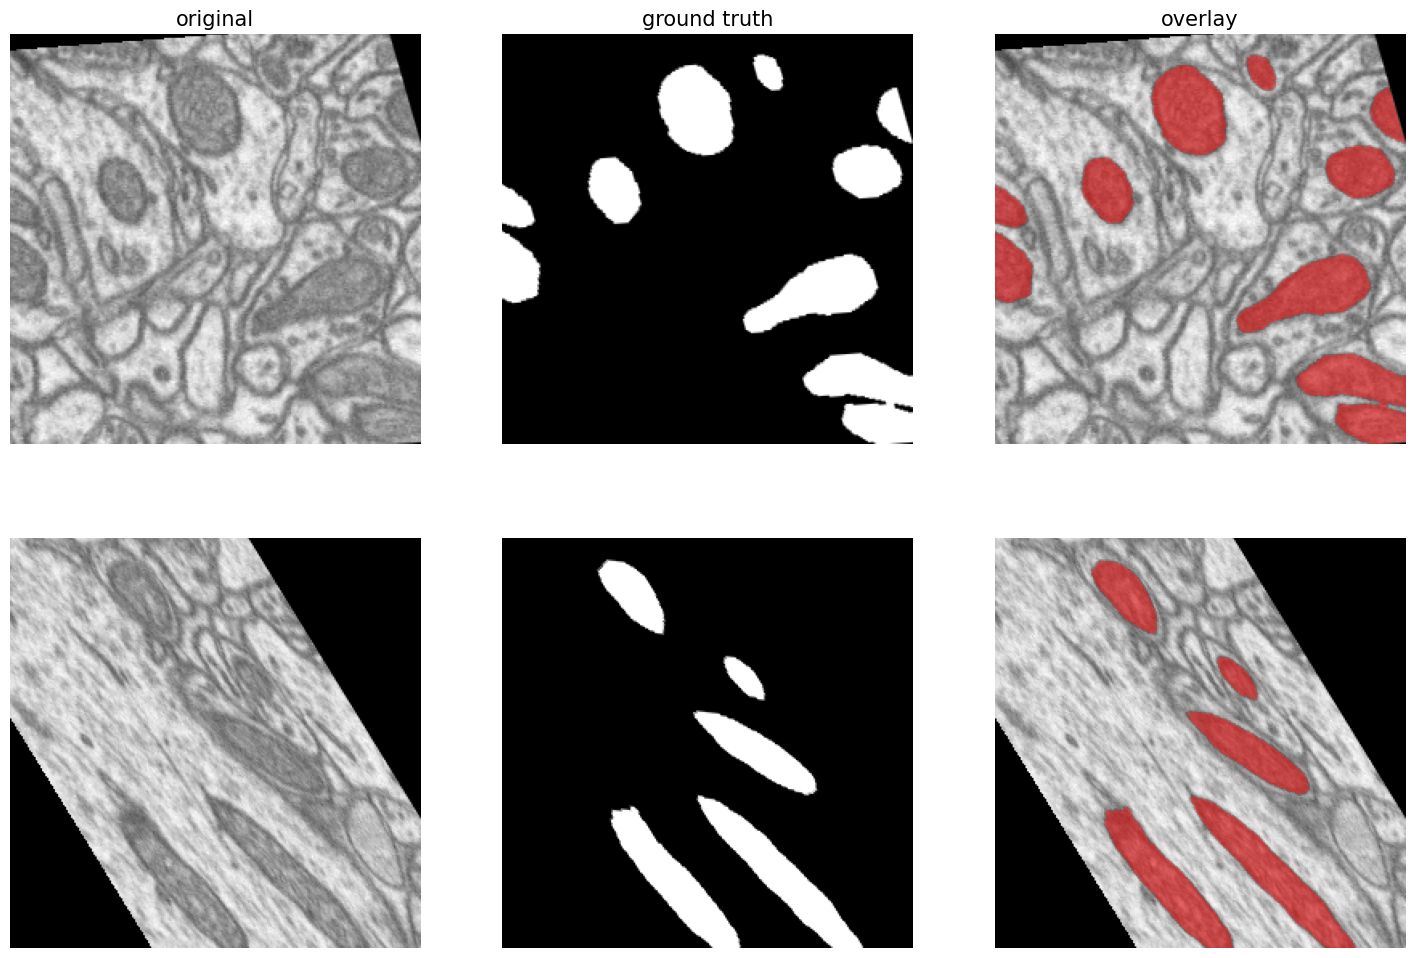

In [39]:
# Run the following code to visualize augmented examples.
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=2, figsize=6)

In [40]:
#
# Now, we set up a U-Net classifier.
#
from keras_unet.models import custom_unet

model = custom_unet(
    X_train[0].shape,
    use_batch_norm=False,
    num_classes=1,
    filters=64,
    dropout=0.2,
    output_activation='sigmoid'
)

In [ ]:
# TODO: How many  trainable parameters does the model use?
# TODO: YOUR_ANSWER:  The model has a single convolutional layer with 64 filters, followed by a single max pooling layer,
#then another convolutional layer with 128 filters, another max pooling layer, and so on. The exact number of filters and
#layers in the model may vary depending on the input size and other parameters. As a rough estimate, a U-Net model with two
 #convolutional layers and 64 filters in the first layer and 128 filters in the second layer would have around 3 million trainable parameters.

In [43]:
#
# Let's compile the model. Please use a LEARNING_RATE of 0.01
# and a MOMENTUM of 0.99.
#
LEARNING_RATE = 0.01
MOMENTUM = 0.99

In [44]:
#
# We will use Stochastic Gradient Descent as optimizer
# and use IoU as a metric.
#
from keras.optimizers import SGD
from keras_unet.metrics import iou, iou_thresholded

model.compile(
    optimizer=SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM),
    loss='binary_crossentropy',
    metrics=[iou, iou_thresholded]
)

In [ ]:
# TODO: Please explain Intersect-over-Union (IoU) in just a few sentences.
# TODO: YOUR_ANSWER: IoU is a metric that measures the overlap between predicted and ground truth segmentation masks.
# It ranges from 0 to 1,  1 indicates perfect overlap. It is commonly used to evaluate image segmentation models.

In [45]:
#
# Now let's train the model for 30 epochs!
#
# TODO: Please complete the code below.
# Hint: Don't forget to use the train_gen from above as training data.
# Hint 2: Please don't forget (X_val, y_val) as validation data.
# Hint 3: steps_per_epoch should be set to all of the X_train.
# Hint 4: This will take roughly 30 minutes.
# Hint 5: If you are stuck, look through the repo of keras_unet!
#
history = model.fit(
    train_gen,
    epochs=30,
    steps_per_epoch=len(X_train),
    validation_data=(X_val, y_val)
)

Epoch 1/30
369/369 [==============================] - 113s 273ms/step - loss: 0.2230 - iou: 0.0663 - iou_thresholded: 2.7406e-04 - val_loss: 0.2256 - val_iou: 0.1084 - val_iou_thresholded: 6.0699e-06
Epoch 2/30
369/369 [==============================] - 58s 158ms/step - loss: 0.1572 - iou: 0.1737 - iou_thresholded: 0.1289 - val_loss: 0.1711 - val_iou: 0.1585 - val_iou_thresholded: 6.0699e-06
Epoch 3/30
369/369 [==============================] - 58s 156ms/step - loss: 0.1285 - iou: 0.2698 - iou_thresholded: 0.3090 - val_loss: 0.0977 - val_iou: 0.4420 - val_iou_thresholded: 0.5300
Epoch 4/30
369/369 [==============================] - 58s 156ms/step - loss: 0.1046 - iou: 0.3547 - iou_thresholded: 0.4209 - val_loss: 0.0698 - val_iou: 0.5683 - val_iou_thresholded: 0.7068
Epoch 5/30
369/369 [==============================] - 58s 156ms/step - loss: 0.0886 - iou: 0.4375 - iou_thresholded: 0.5463 - val_loss: 0.0651 - val_iou: 0.6691 - val_iou_thresholded: 0.7276
Epoch 6/30
369/369 [============

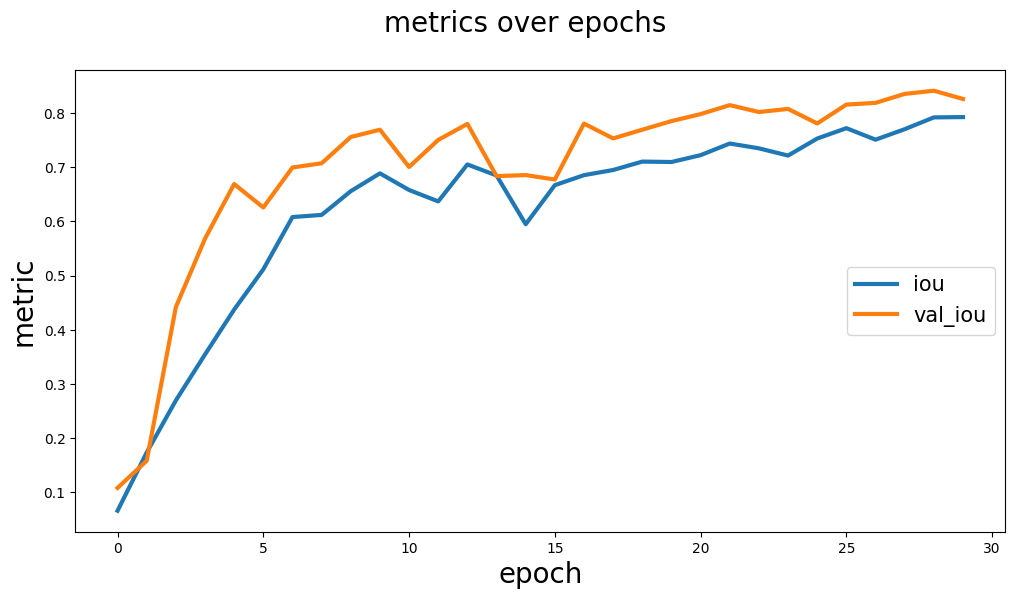

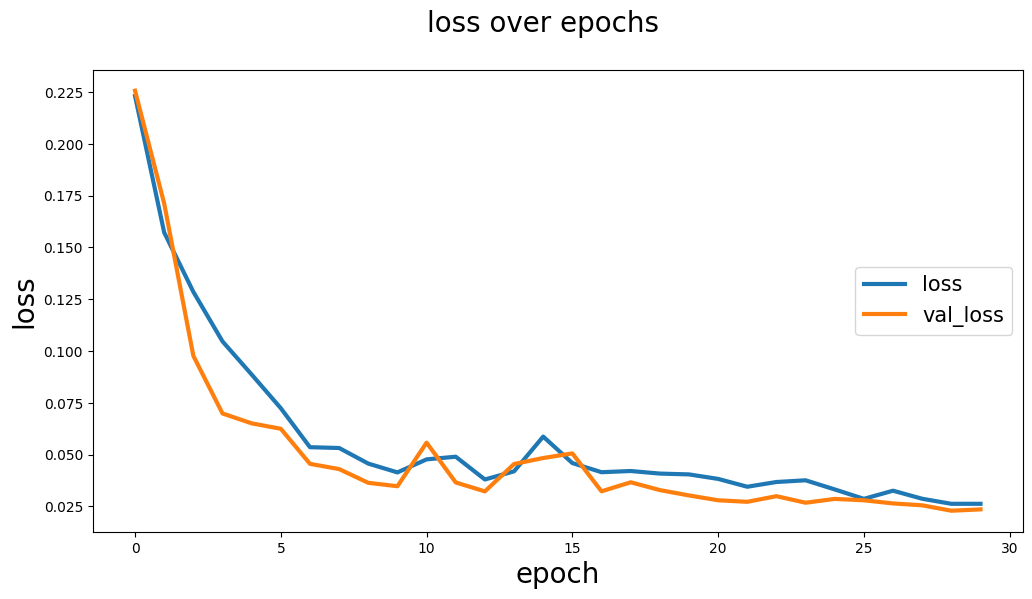

In [46]:
# We can use keras_unet functionality to visualize metrics and loss during training.
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [ ]:
# TODO: Do these plots look good to you?
# TODO: YOUR_ANSWER : YES It looks good enough.

## 3. Evaluate U-Net (10 points)

In [47]:
# Let's predict all of X_test
y_pred = model.predict(X_test)

5/5 [==============================] - 5s 1s/step


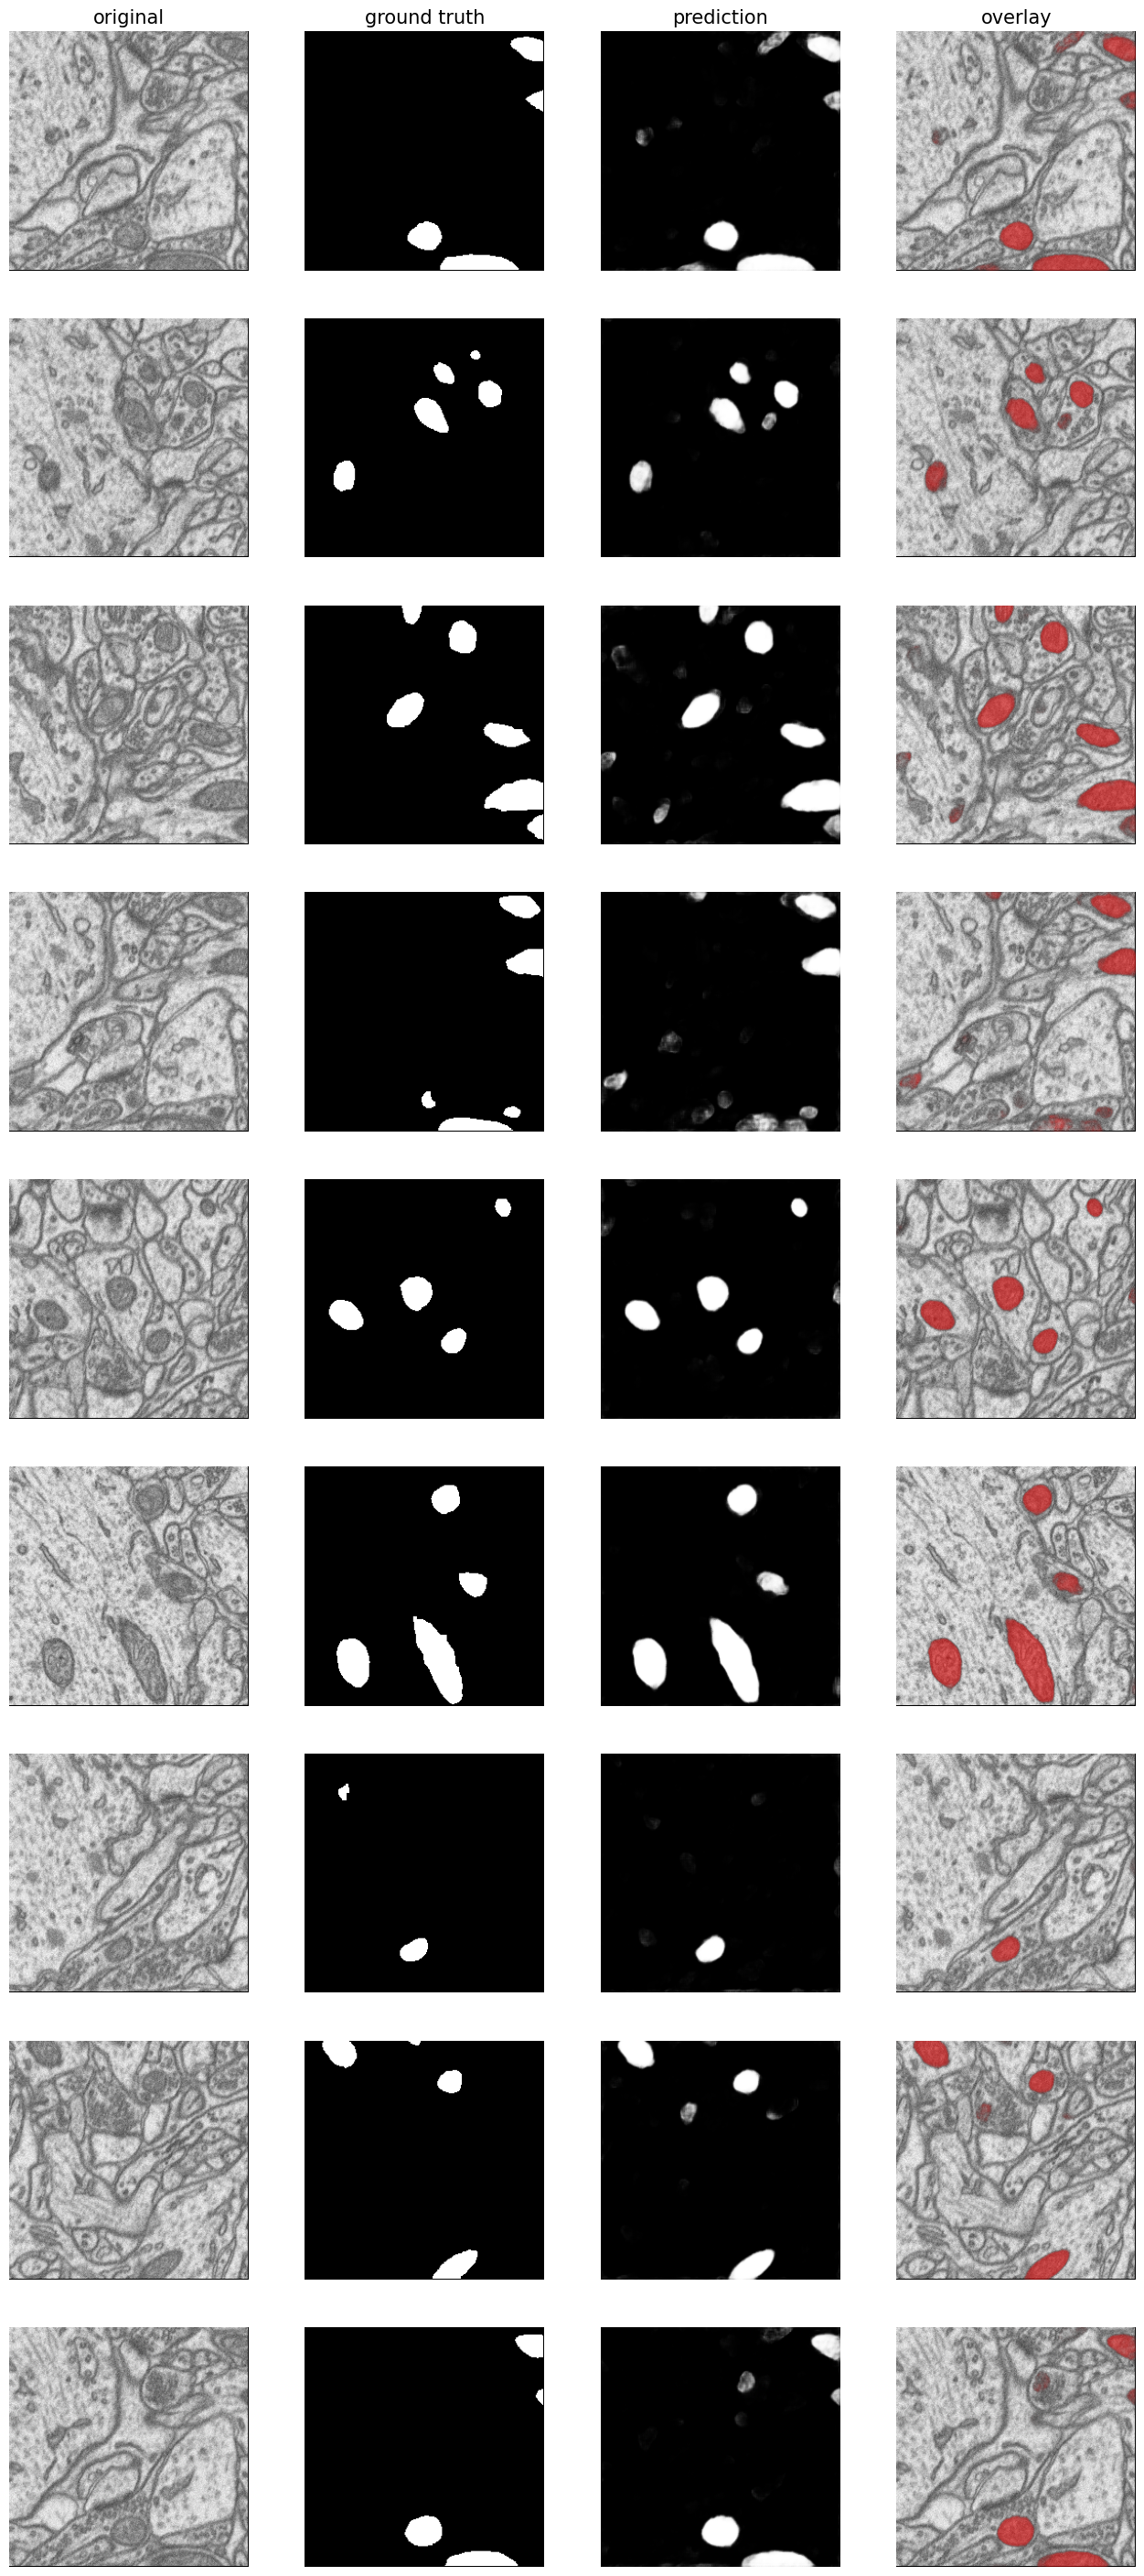

In [48]:
# ...and look at some results.
plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=9)

In [49]:
import sklearn.metrics

In [50]:
# Let's use the Jaccard score to compare a thresholded
# y_pred to the groundtruth y_test.
sklearn.metrics.jaccard_score(y_test.ravel(), (y_pred > 0.5).ravel())

0.8915713386573128

In [ ]:
# TODO: What is the difference between Jaccard Score and Intersect-over-Union from above?
# TODO: YOUR_ANSWER :The Jaccard score and Intersect-over-Union are equivalent metrics for measuring the overlap
# between the predicted segmentation and the ground truth. In this case, the Jaccard score is calculated using the
# sklearn.metrics.jaccard_score function by comparing the binary thresholded y_pred values to the binary y_test values. 
#The thresholding is performed by setting a threshold value of 0.5, which converts the predicted values to binary (0 or 1).

In [ ]:
# TODO: Did the U-Net perform well on X_test?
# TODO: YOUR_ANSWER : Yes , U-Net performed well on X_test.

## 4. Combine U-Net with SAM (10 points)

In [ ]:
# Instead of running SAM in auto mode without seeds (Task 1), we will now
# use the U-Net predictions on X_test to seed the SAM model.

In [52]:
# We can use the following convenience functions
# to 1) convert mahotas bounding boxes to SAM format
# and 2) combine the SAM output tensors to a mask.

In [51]:
def mahotas_bbox_to_sam(bbs):

  new_bbs = []

  for i,bb in enumerate(bbs):
    # from (y1, y2, x1, x2)
    # to (x1, y1, x2, y2)
    if i == 0:
      continue
    new_bb = [bb[2], bb[0], bb[3], bb[1]]
    new_bbs.append(new_bb)

  return new_bbs

In [53]:
def sam_to_mask(results):

  results = results.cpu() # copy back to cpu land

  mask = np.array(results[0,0])

  for s in results:
    mask[s[0] == 1] = 1

  return mask

In [ ]:
# The following code combines the U-Net predictions with SAM.
#
# TODO: Please study the code and answer the TODOs in-line.

In [54]:
y_pred_sam = y_pred.copy()
y_pred_sam[:] = 0

for z,img in enumerate(X_test):

  # TODO: EXPLAIN CODE BELOW
  # It saves the image as a .png file named 'test.png'. The image is normalized to the range [0, 255] before being saved.
  mh.imsave('test.png', (img[:,:,0]*255).astype(np.uint8))

  # TODO: EXPLAIN CODE BELOW
  #It thresholds  the predicted segmentation mask of the U-Net model at 0.5. This produces a binary image.
  pred = (y_pred[z] > 0.5)

  # TODO: EXPLAIN CODE BELOW
  # It labels each connected component in the binary image separately
  pred, _ = mh.labeled.label(pred)
  
  # TODO: EXPLAIN CODE BELOW
  #It extracts the bounding boxes for each labeled connected component.
  bbs = mh.labeled.bbox(pred)

  # TODO: EXPLAIN CODE BELOW
  #It converts the bounding box coordinates from the Mahotas format to the format expected by the SAM model.
  bbs_converted = mahotas_bbox_to_sam(bbs)

  # TODO: EXPLAIN CODE BELOW
  # It applies the SAM model to the image, using the bounding boxes as input.
  results = SegManualMaskPredictor().image_predict(
      source="test.png",
      model_type="vit_l", # vit_l, vit_h, vit_b
      input_box=bbs_converted, 
      multimask_output=False,
      random_color=False,
      show=False,
      save=False,
  )

  # TODO: EXPLAIN CODE BELOW
  #It converts the SAM output to a binary mask.
  sam_and_unet_pred = sam_to_mask(results)

  # TODO: EXPLAIN CODE BELOW
  #It adds the SAM output to the U-Net output for the current image.
  y_pred_sam[z,:,:,0] = sam_and_unet_pred

vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l mo

## 5. Compare U-Net vs. U-Net+SAM. (10 points)

In [55]:
# U-Net performance on X_test (from Task 3)
sklearn.metrics.jaccard_score(y_test.ravel(), (y_pred > 0.5).ravel())

0.8915713386573128

In [56]:
# U-Net + SAM performance on X_test
sklearn.metrics.jaccard_score(y_test.ravel(), y_pred_sam.ravel())

0.8594181948791022

In [ ]:
# TODO: Please explain the results - is U-Net+SAM a good addition?
# TODO: YOUR_ANSWER: The Jaccard score for the U-Net predictions on X_test was 0.8915, 
#while the Jaccard score for the combined U-Net+SAM predictions on X_test was 0.8594. 
#This suggests that the addition of SAM did not improve the overall performance of the segmentation model.

In [ ]:
#CITATIONS AND REFERENCES FOR THIS ASSIGNMENT: 
  #https://github.com/karolzak/keras-unet
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
#https://medium.com/analytics-vidhya/iou-intersection-over-union-705a39e7acef


## Bonus: Improve the results. (33 points)

In [ ]:
# Please improve the results of U-Net+SAM and show the improved Jaccard score.

In [58]:
# TODO: YOUR_CODE: 

In [ ]:
#
# You made it!!
#
#                 _ ___                /^^\ /^\  /^^\_
#     _          _@)@) \            ,,/ '` ~ `'~~ ', `\.
#   _/o\_ _ _ _/~`.`...'~\        ./~~..,'`','',.,' '  ~:
#  / `,'.~,~.~  .   , . , ~|,   ,/ .,' , ,. .. ,,.   `,  ~\_
# ( ' _' _ '_` _  '  .    , `\_/ .' ..' '  `  `   `..  `,   \_
#  ~V~ V~ V~ V~ ~\ `   ' .  '    , ' .,.,''`.,.''`.,.``. ',   \_
#   _/\ /\ /\ /\_/, . ' ,   `_/~\_ .' .,. ,, , _/~\_ `. `. '.,  \_
#  < ~ ~ '~`'~'`, .,  .   `_: ::: \_ '      `_/ ::: \_ `.,' . ',  \_
#   \ ' `_  '`_    _    ',/ _::_::_ \ _    _/ _::_::_ \   `.,'.,`., \-,-,-,_,_,
#    `'~~ `'~~ `'~~ `'~~  \(_)(_)(_)/  `~~' \(_)(_)(_)/ ~'`\_.._,._,'_;_;_;_;_;
#